<a href="https://www.kaggle.com/code/manikverma2/sentiment-analysis-using-imdb?scriptVersionId=242433198" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-sentiment-analysis/IMDB_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Load IMDB dataset (or any CSV of reviews)
df = pd.read_csv('/kaggle/input/imdb-dataset-sentiment-analysis/IMDB_dataset.csv')  # Columns: 'review', 'sentiment'

# Optional: if using raw data without labels, use VADER
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

df['vader_score'] = df['review'].apply(get_sentiment_score)
df['label'] = df['vader_score'].apply(lambda x: 1 if x >= 0 else 0)  # Binary label


2025-05-28 21:17:18.715985: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748467039.018985      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748467039.115628      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # remove HTML
    text = re.sub(r'[^a-zA-Z ]', '', text)  # remove non-letters
    return text.lower()

df['clean_review'] = df['review'].apply(clean_text)


In [4]:
MAX_WORDS = 10000
MAX_LEN = 200

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df['clean_review'])

X = tokenizer.texts_to_sequences(df['clean_review'])
X = pad_sequences(X, maxlen=MAX_LEN)
y = df['label'].values


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

train_history= model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-05-28 21:19:42.437333: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 237ms/step - accuracy: 0.6907 - loss: 0.5890 - val_accuracy: 0.7929 - val_loss: 0.4324
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 236ms/step - accuracy: 0.8460 - loss: 0.3646 - val_accuracy: 0.8202 - val_loss: 0.3992
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 237ms/step - accuracy: 0.8930 - loss: 0.2672 - val_accuracy: 0.8395 - val_loss: 0.4182
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 238ms/step - accuracy: 0.9167 - loss: 0.2163 - val_accuracy: 0.8388 - val_loss: 0.3947
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 235ms/step - accuracy: 0.9398 - loss: 0.1667 - val_accuracy: 0.8316 - val_loss: 0.4504
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 240ms/step - accuracy: 0.9460 - loss: 0.1446 - val_accuracy: 0.8286 - val_loss: 0.4934
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 240ms/step - accuracy: 0.9637 - loss: 0.1084 - val_accuracy: 0.8316 - val_loss: 0.5821
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 240ms/step - accuracy: 0.9669 - loss: 0

In [7]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

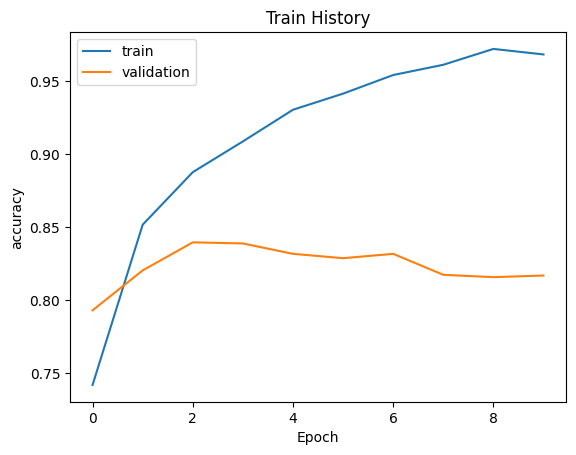

In [8]:
show_train_history(train_history,'accuracy','val_accuracy')

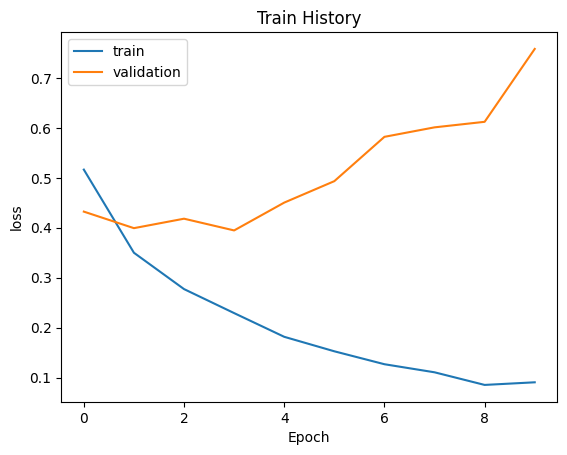

In [9]:
show_train_history(train_history,'loss','val_loss')

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2%}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8170 - loss: 0.7593
Test Accuracy: 81.85%


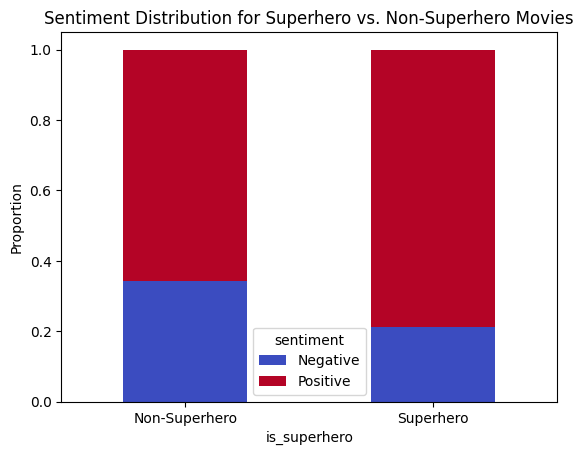

In [11]:
df['sentiment'] = df['label'].map({1: 'Positive', 0: 'Negative'})
df['is_superhero'] = df['review'].str.contains('superhero|marvel|avengers|batman', case=False)

sentiment_trend = df.groupby('is_superhero')['sentiment'].value_counts(normalize=True).unstack()

sentiment_trend.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sentiment Distribution for Superhero vs. Non-Superhero Movies')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Non-Superhero', 'Superhero'], rotation=0)
plt.show()


Mulitclass


In [12]:
def classify_sentiment(score):
    if score >= 0.05:
        return 1     # Positive
    elif score <= -0.05:
        return -1    # Negative
    else:
        return 0     # Neutral

df['vader_score'] = df['review'].apply(get_sentiment_score)
df['label'] = df['vader_score'].apply(classify_sentiment)


In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert -1, 0, 1 to 0, 1, 2
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['label'])  # -1 → 0, 0 → 1, 1 → 2
y_cat = to_categorical(y_encoded, num_classes=3)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)


In [15]:
model = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
    LSTM(64),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 240ms/step - accuracy: 0.6548 - loss: 0.7333 - val_accuracy: 0.7574 - val_loss: 0.5064
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 236ms/step - accuracy: 0.8133 - loss: 0.4516 - val_accuracy: 0.8170 - val_loss: 0.4308
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 235ms/step - accuracy: 0.8676 - loss: 0.3450 - val_accuracy: 0.8165 - val_loss: 0.4235
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 235ms/step - accuracy: 0.8962 - loss: 0.2842 - val_accuracy: 0.8096 - val_loss: 0.4404
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 233ms/step - accuracy: 0.9156 - loss: 0.2365 - val_accuracy: 0.8201 - val_loss: 0.4904


In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Multiclass Accuracy: {accuracy:.2%}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8268 - loss: 0.4853
Multiclass Accuracy: 82.63%


In [17]:
# Example prediction
pred_probs = model.predict(X_test[:5])
pred_classes = np.argmax(pred_probs, axis=1)

# Map back to [-1, 0, 1]
decoded_preds = label_encoder.inverse_transform(pred_classes)
print("Predicted Sentiment Classes:", decoded_preds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
Predicted Sentiment Classes: [1 1 1 1 1]


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step


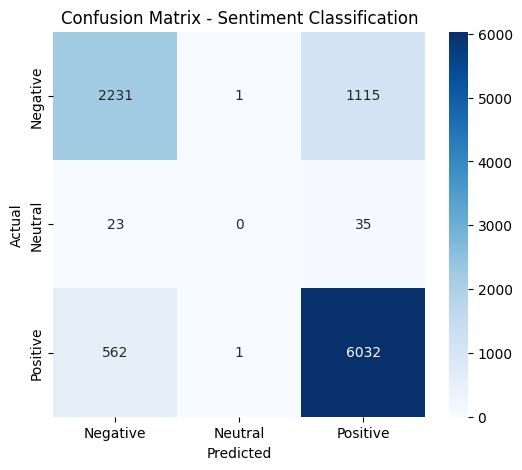

              precision    recall  f1-score   support

    Negative       0.79      0.67      0.72      3347
     Neutral       0.00      0.00      0.00        58
    Positive       0.84      0.91      0.88      6595

    accuracy                           0.83     10000
   macro avg       0.54      0.53      0.53     10000
weighted avg       0.82      0.83      0.82     10000



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Sentiment Classification')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=labels))


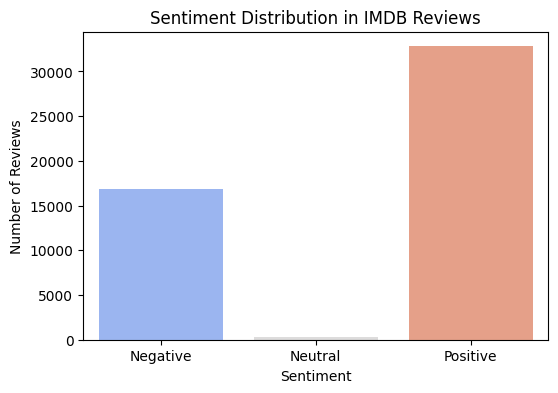

In [19]:
# Use original labels (-1, 0, 1)
sentiment_labels = {-1: "Negative", 0: "Neutral", 1: "Positive"}
df['sentiment_category'] = df['label'].map(sentiment_labels)

plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment_category', data=df, order=['Negative', 'Neutral', 'Positive'], palette='coolwarm')
plt.title('Sentiment Distribution in IMDB Reviews')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment')
plt.show()


HYPERTUNING

In [20]:
# Parameters to experiment with
EMBEDDING_DIM = 128  # Try: 100, 200
LSTM_UNITS = 64      # Try: 32, 128
DROPOUT_RATE = 0.5   # Try: 0.3, 0.6
BATCH_SIZE = 128     # Try: 64, 256
EPOCHS = 5           # Try: 10 or use EarlyStopping


In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    callbacks=[early_stop, lr_schedule]
)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 235ms/step - accuracy: 0.9399 - loss: 0.1805 - val_accuracy: 0.8190 - val_loss: 0.5432 - learning_rate: 0.0010
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 234ms/step - accuracy: 0.9549 - loss: 0.1343 - val_accuracy: 0.8120 - val_loss: 0.5858 - learning_rate: 0.0010
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 238ms/step - accuracy: 0.9635 - loss: 0.1124 - val_accuracy: 0.8134 - val_loss: 0.7272 - learning_rate: 0.0010
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 238ms/step - accuracy: 0.9777 - loss: 0.0766 - val_accuracy: 0.7984 - val_loss: 0.6948 - learning_rate: 5.0000e-04


In [22]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 525ms/step - accuracy: 0.6238 - loss: 0.7741 - val_accuracy: 0.6790 - val_loss: 0.6498
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 129s 518ms/step - accuracy: 0.7242 - loss: 0.5932 - val_accuracy: 0.7820 - val_loss: 0.4968
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 130s 521ms/step - accuracy: 0.8298 - loss: 0.4155 - val_accuracy: 0.8319 - val_loss: 0.3993
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 130s 521ms/step - accuracy: 0.8841 - loss: 0.3125 - val_accuracy: 0.8416 - val_loss: 0.3877
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 129s 517ms/step - accuracy: 0.9180 - loss: 0.2388 - val_accuracy: 0.8425 - val_loss: 0.4049


In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Multiclass Accuracy: {accuracy:.2%}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.8420 - loss: 0.4069
Multiclass Accuracy: 84.43%


In [25]:
# Example prediction
pred_probs = model.predict(X_test[:5])
pred_classes = np.argmax(pred_probs, axis=1)

# Map back to [-1, 0, 1]
decoded_preds = label_encoder.inverse_transform(pred_classes)
print("Predicted Sentiment Classes:", decoded_preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
Predicted Sentiment Classes: [ 1  1 -1  1  1]


In [26]:
model.save("sentiment_model.h5")
import pickle

# Save tokenizer and label encoder
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)
